In [1]:
from lxml import html
import requests
from collections import OrderedDict
import json
import argparse
import pandas as pd
import csv

def parse(input_file):
    restaurants = []
    for line in input_file:
        url = line
        response = requests.get(url).text
        parser = html.fromstring(response)
	
        XPATH_RATING = '//div[@id="ratingFilter"]//ul//li'

        XPATH_TRAVELER = '//div[@class="col segment extraWidth"]//ul//li'
        XPATH_TIME = '//div[@class="col season extraWidth"]//ul/li'
        XPATH_LANGUAGE = '//div[@class="col language extraWidth"]//ul/li'
#        XPATH_DETAILS = '//div[contains(@class,"details_tab")]//div[contains(@class, "table_section")]//text()'
        XPATH_NAME = '//h1[@property="name"]//text()'
        XPATH_HOTEL_RATING = '//span[@property="ratingValue"]//@content'
        XPATH_REVIEWS = '//a[@property="reviewCount"]/@content'
        XPATH_RANK = '//div[@class="slim_ranking"]//text()'
#         XPATH_OFFICIAL_DESCRIPTION = '//div[contains(@class,"additional_info")]//span[contains(@class,"tabs_descriptive_text")]//text()'
#         XPATH_OFFICIAL_DESCRIPTION = '//div[@class="additional_info"]//div'
        XPATH_LATITUDE = '//div[@class="mapContainer"]//@data-lat'
        XPATH_LONGITUDE = '//div[@class="mapContainer"]//@data-lng'
                                        
        ratings = parser.xpath(XPATH_RATING)
        travelers = parser.xpath(XPATH_TRAVELER)
        times = parser.xpath(XPATH_TIME)
        languages = parser.xpath(XPATH_LANGUAGE)
	
        raw_name = parser.xpath(XPATH_NAME)
        raw_rank = parser.xpath(XPATH_RANK)
        raw_review_count = parser.xpath(XPATH_REVIEWS)
        raw_rating = parser.xpath(XPATH_HOTEL_RATING)
#         raw_official_description = parser.xpath(XPATH_OFFICIAL_DESCRIPTION)
#        raw_details = parser.xpath(XPATH_DETAILS)
        raw_latitude = parser.xpath(XPATH_LATITUDE)
        raw_longitude = parser.xpath(XPATH_LONGITUDE)
					
        name = ''.join(raw_name).strip() if raw_name else None
        rank = ''.join(raw_rank).strip() if raw_rank else None
        review_count = ''.join(raw_review_count).strip() if raw_review_count else None
        hotel_rating = ''.join(raw_rating).strip() if raw_rating else None
#         official_description = ' '.join(' '.join(raw_official_description).split()) if raw_official_description else None
#        details = ' '.join(' '.join(raw_details).split()) if raw_details else None
        latitude = ' '.join(' '.join(raw_latitude).split()) if raw_latitude else None  
        longitude = ' '.join(' '.join(raw_longitude).split()) if raw_longitude else None 

        ratings_dict = OrderedDict()
        for rating in ratings:
            XPATH_RATING_KEY = './/div[@class="row_label"]//text()'
            XPATH_RATING_VALUE = './/span[@class="row_bar"]/following-sibling::span//text()'
            raw_rating_key = rating.xpath(XPATH_RATING_KEY)
            raw_rating_value = rating.xpath(XPATH_RATING_VALUE)
            cleaned_rating_key = ''.join(raw_rating_key).replace('\n','')
            cleaned_rating_value = ''.join(raw_rating_value).replace('\n','')
            ratings_dict.update({cleaned_rating_key:cleaned_rating_value})
    
        travelers_list = [] 
        for traveler in travelers:
            XPATH_TRAVELER_TYPE = './/label//text()'
            XPATH_TRAVELER_COUNT = './/span//text()'
            raw_traveler_type = traveler.xpath(XPATH_TRAVELER_TYPE)
            raw_traveler_count = traveler.xpath(XPATH_TRAVELER_COUNT)
            cleaned_traveler_type = ''.join(raw_traveler_type).replace('\n','').split(' ')
            cleaned_traveler_type = cleaned_traveler_type[0]
            cleaned_traveler_count = ''.join(raw_traveler_count).replace('\n','')
            travelers_list.append((cleaned_traveler_type,cleaned_traveler_count))
        
        times_list = []
        for time in times:
            XPATH_TIME_TYPE = './/label//text()'
            XPATH_TIME_COUNT = './/span//text()'
            raw_time_type = time.xpath(XPATH_TIME_TYPE)
            raw_time_count = time.xpath(XPATH_TIME_COUNT)
            cleaned_time_type = ''.join(raw_time_type).replace('\n','').split(' ')
            cleaned_time_type = cleaned_time_type[0]
            cleaned_time_count = ''.join(raw_time_count).replace('\n','')
            times_list.append((cleaned_time_type, cleaned_time_count))
        
        language_list = []
        for language in languages:
            XPATH_LANGUAGE_TYPE = './/label//text()'
            XPATH_LANGUAGE_COUNT = './/span//text()'
            raw_language_type = language.xpath(XPATH_LANGUAGE_TYPE)
            raw_language_count = language.xpath(XPATH_LANGUAGE_COUNT)
            cleaned_language_type = ''.join(raw_language_type).replace('\n','').split(' ')
            cleaned_language_type = cleaned_language_type[0]
            cleaned_language_count = ''.join(raw_language_count).replace('\n','')
            language_list.append(cleaned_language_type)
        language_list = language_list[1:]


        data = {'name':name,
				'rank':rank,
				'rating':hotel_rating,
                'review_count':review_count,
                'latitude':latitude,
                'longitude':longitude,
#                 'official_description':official_description,
                  'travelers':travelers_list,
                  'times of year':times_list,
                  'languages':language_list
#                  'details':details
	    }
        restaurants.append(data)
        
        
#    columns = ['property_title', 'rank', 'rating', 'review_count', 'location', 'official_description', 'travelers', 'times', 'langauges']
    df = pd.DataFrame(restaurants)
    return df



input_file = open('links.csv', 'r')
links = []
for i in input_file:
    links.append('https://www.tripadvisor.com'+i)
scraped_data = parse(links)
scraped_data

,languages,latitude,longitude,name,rank,rating,review_count,times of year,travelers
0,"[English(233), Spanish(20), French(16), ]",31.952438,35.937958,Pizza Roma Cafe,#1 of 550 Restaurants in Amman,4.5,305,"[(Mar-May, (67)), (Jun-Aug, (39)), (Sep-Nov, (...","[(Families, (24)), (Couples, (58)), (Solo, (56..."
1,"[English(262), Arabic(4), French(2), ]",31.963032,35.89816,Brisket,#2 of 550 Restaurants in Amman,4.5,271,"[(Mar-May, (57)), (Jun-Aug, (58)), (Sep-Nov, (...","[(Families, (56)), (Couples, (24)), (Solo, (19..."
2,"[English(539), Arabic(40), Chinese, ]",31.951878,35.9332,Habibah Sweets,#3 of 550 Restaurants in Amman,4.5,675,"[(Mar-May, (159)), (Jun-Aug, (119)), (Sep-Nov,...","[(Families, (150)), (Couples, (75)), (Solo, (4..."
3,"[English(677), Italian(31), Arabic(28), ]",31.952278,35.92017,Fakhreldin Restaurant,#4 of 550 Restaurants in Amman,4.5,790,"[(Mar-May, (203)), (Jun-Aug, (146)), (Sep-Nov,...","[(Families, (165)), (Couples, (79)), (Solo, (1..."
4,"[English(607), Italian(33), Chinese, ]",31.94924,35.929058,Sufra Restaurant,#5 of 550 Restaurants in Amman,4.5,706,"[(Mar-May, (182)), (Jun-Aug, (134)), (Sep-Nov,...","[(Families, (126)), (Couples, (88)), (Solo, (2..."
5,"[English(460), Italian(79), Spanish(56), ]",31.992243,35.866783,Tawaheen al-Hawa,#6 of 550 Restaurants in Amman,4.5,713,"[(Mar-May, (133)), (Jun-Aug, (89)), (Sep-Nov, ...","[(Families, (111)), (Couples, (77)), (Solo, (9..."
6,"[English(273), French(4), Italian(3), ]",31.952156,35.91342,Chestnut Restaurant & Pub,#7 of 550 Restaurants in Amman,4.5,284,"[(Mar-May, (80)), (Jun-Aug, (57)), (Sep-Nov, (...","[(Families, (21)), (Couples, (26)), (Solo, (9)..."
7,"[English(59), Japanese(1)]",31.961784,35.8701,V Lounge & Restaurant,#9 of 550 Restaurants in Amman,5,60,"[(Mar-May, (55)), (Jun-Aug, (2)), (Sep-Nov, (1...","[(Families, (9)), (Couples, (7)), (Solo, (3)),..."
8,"[English(1,045), Italian(109), French(46), ]",31.952234,35.93188,Hashem,#8 of 550 Restaurants in Amman,4.5,1374,"[(Mar-May, (297)), (Jun-Aug, (226)), (Sep-Nov,...","[(Families, (167)), (Couples, (219)), (Solo, (..."
9,"[English(81), French(2), Italian(2), ]",31.953451,35.884483,Melograno,#10 of 550 Restaurants in Amman,4.5,86,"[(Mar-May, (29)), (Jun-Aug, (7)), (Sep-Nov, (2...","[(Families, (21)), (Couples, (14)), (Solo, (2)..."


In [2]:
with open('restaurants_details3.csv', 'w') as csvfile:
    scraped_data.to_csv(csvfile,columns = ['latitude','longitude','name'], encoding='utf-8')

In [3]:
scraped_data.dropna()

,languages,latitude,longitude,name,rank,rating,review_count,times of year,travelers
0,"[English(233), Spanish(20), French(16), ]",31.952438,35.937958,Pizza Roma Cafe,#1 of 550 Restaurants in Amman,4.5,305,"[(Mar-May, (67)), (Jun-Aug, (39)), (Sep-Nov, (...","[(Families, (24)), (Couples, (58)), (Solo, (56..."
1,"[English(262), Arabic(4), French(2), ]",31.963032,35.89816,Brisket,#2 of 550 Restaurants in Amman,4.5,271,"[(Mar-May, (57)), (Jun-Aug, (58)), (Sep-Nov, (...","[(Families, (56)), (Couples, (24)), (Solo, (19..."
2,"[English(539), Arabic(40), Chinese, ]",31.951878,35.9332,Habibah Sweets,#3 of 550 Restaurants in Amman,4.5,675,"[(Mar-May, (159)), (Jun-Aug, (119)), (Sep-Nov,...","[(Families, (150)), (Couples, (75)), (Solo, (4..."
3,"[English(677), Italian(31), Arabic(28), ]",31.952278,35.92017,Fakhreldin Restaurant,#4 of 550 Restaurants in Amman,4.5,790,"[(Mar-May, (203)), (Jun-Aug, (146)), (Sep-Nov,...","[(Families, (165)), (Couples, (79)), (Solo, (1..."
4,"[English(607), Italian(33), Chinese, ]",31.94924,35.929058,Sufra Restaurant,#5 of 550 Restaurants in Amman,4.5,706,"[(Mar-May, (182)), (Jun-Aug, (134)), (Sep-Nov,...","[(Families, (126)), (Couples, (88)), (Solo, (2..."
5,"[English(460), Italian(79), Spanish(56), ]",31.992243,35.866783,Tawaheen al-Hawa,#6 of 550 Restaurants in Amman,4.5,713,"[(Mar-May, (133)), (Jun-Aug, (89)), (Sep-Nov, ...","[(Families, (111)), (Couples, (77)), (Solo, (9..."
6,"[English(273), French(4), Italian(3), ]",31.952156,35.91342,Chestnut Restaurant & Pub,#7 of 550 Restaurants in Amman,4.5,284,"[(Mar-May, (80)), (Jun-Aug, (57)), (Sep-Nov, (...","[(Families, (21)), (Couples, (26)), (Solo, (9)..."
7,"[English(59), Japanese(1)]",31.961784,35.8701,V Lounge & Restaurant,#9 of 550 Restaurants in Amman,5,60,"[(Mar-May, (55)), (Jun-Aug, (2)), (Sep-Nov, (1...","[(Families, (9)), (Couples, (7)), (Solo, (3)),..."
8,"[English(1,045), Italian(109), French(46), ]",31.952234,35.93188,Hashem,#8 of 550 Restaurants in Amman,4.5,1374,"[(Mar-May, (297)), (Jun-Aug, (226)), (Sep-Nov,...","[(Families, (167)), (Couples, (219)), (Solo, (..."
9,"[English(81), French(2), Italian(2), ]",31.953451,35.884483,Melograno,#10 of 550 Restaurants in Amman,4.5,86,"[(Mar-May, (29)), (Jun-Aug, (7)), (Sep-Nov, (2...","[(Families, (21)), (Couples, (14)), (Solo, (2)..."


In [4]:
scraped_data2 = pd.DataFrame(scraped_data.dropna())

In [5]:
lat = [(float(x)) for x in scraped_data2['latitude']]
long = [(float(x)) for x in scraped_data2['longitude']]

In [6]:
print((max(lat)+min(lat))/2)
print((max(lat)))
print((min(lat)))
print((max(long)+min(long))/2)

31.918763499999997
31.992243
31.845284
35.905562


In [7]:
#import gmplot

#gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

#gmap.plot(latitudes, longitudes, 'cornflowerblue', edge_width=10)
#gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)
#gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
#gmap.heatmap(heat_lats, heat_lngs)

#gmap.draw("mymap.html")

In [8]:
#https://pypi.python.org/pypi/gmplot/1.0.5

In [9]:
#https://github.com/tcassou/gmaps    map examples

In [10]:
from collections import Counter
import re
#def convert(string):
#    return Counter(re.findall('[A-Z][a-z]*', string))
import ast
languages_dictsList = []
for i in scraped_data2['languages']:
    lang = (re.findall('[A-Z][a-z]*', str(i)))
    freq = (re.findall('[1-9][0-9]*', str(i)))
    dictionary = dict(zip(lang, freq))
    languages_dictsList.append(dictionary)
lang_df = pd.DataFrame(languages_dictsList)
new_names = [(i,'lang_'+i) for i in lang_df.iloc[:, 0:].columns.values]
lang_df.rename(columns = dict(new_names), inplace=True) #adding prefix to know what type of cat
resulting_df = scraped_data2.join(lang_df)
resulting_df.fillna(value=0, inplace=True) #final dataframe with languages of reviews as categories

In [11]:
travelers_dictsList = []
for i in scraped_data2['travelers']:
    trav = (re.findall('[A-Z][a-z]*', str(i)))
    freq = (re.findall('[1-9][0-9]*', str(i)))
    dictionary = dict(zip(trav, freq))
    travelers_dictsList.append(dictionary)
travelers_df = pd.DataFrame(travelers_dictsList)
new_names = [(i,'travType_'+i) for i in travelers_df.iloc[:, 0:].columns.values] 
travelers_df.rename(columns = dict(new_names), inplace=True) #adding prefix to know what type of cat
resulting_df2 = resulting_df.join(travelers_df)
resulting_df2.fillna(value=0, inplace=True) #types of travelers added as categories 

In [12]:
resulting_df2

,languages,latitude,longitude,name,rank,rating,review_count,times of year,travelers,lang_Arabic,...,lang_German,lang_Italian,lang_Japanese,lang_Russian,lang_Spanish,travType_Business,travType_Couples,travType_Families,travType_Friends,travType_Solo
0,"[English(233), Spanish(20), French(16), ]",31.952438,35.937958,Pizza Roma Cafe,#1 of 550 Restaurants in Amman,4.5,305,"[(Mar-May, (67)), (Jun-Aug, (39)), (Sep-Nov, (...","[(Families, (24)), (Couples, (58)), (Solo, (56...",0,...,0,0,0,0,20,8,58,24,69,56
1,"[English(262), Arabic(4), French(2), ]",31.963032,35.89816,Brisket,#2 of 550 Restaurants in Amman,4.5,271,"[(Mar-May, (57)), (Jun-Aug, (58)), (Sep-Nov, (...","[(Families, (56)), (Couples, (24)), (Solo, (19...",4,...,0,0,0,0,0,8,24,56,133,19
2,"[English(539), Arabic(40), Chinese, ]",31.951878,35.9332,Habibah Sweets,#3 of 550 Restaurants in Amman,4.5,675,"[(Mar-May, (159)), (Jun-Aug, (119)), (Sep-Nov,...","[(Families, (150)), (Couples, (75)), (Solo, (4...",40,...,0,0,0,0,0,31,75,150,144,49
3,"[English(677), Italian(31), Arabic(28), ]",31.952278,35.92017,Fakhreldin Restaurant,#4 of 550 Restaurants in Amman,4.5,790,"[(Mar-May, (203)), (Jun-Aug, (146)), (Sep-Nov,...","[(Families, (165)), (Couples, (79)), (Solo, (1...",28,...,0,31,0,0,0,113,79,165,166,12
4,"[English(607), Italian(33), Chinese, ]",31.94924,35.929058,Sufra Restaurant,#5 of 550 Restaurants in Amman,4.5,706,"[(Mar-May, (182)), (Jun-Aug, (134)), (Sep-Nov,...","[(Families, (126)), (Couples, (88)), (Solo, (2...",0,...,0,33,0,0,0,82,88,126,198,23
5,"[English(460), Italian(79), Spanish(56), ]",31.992243,35.866783,Tawaheen al-Hawa,#6 of 550 Restaurants in Amman,4.5,713,"[(Mar-May, (133)), (Jun-Aug, (89)), (Sep-Nov, ...","[(Families, (111)), (Couples, (77)), (Solo, (9...",0,...,0,79,0,0,56,61,77,111,133,9
6,"[English(273), French(4), Italian(3), ]",31.952156,35.91342,Chestnut Restaurant & Pub,#7 of 550 Restaurants in Amman,4.5,284,"[(Mar-May, (80)), (Jun-Aug, (57)), (Sep-Nov, (...","[(Families, (21)), (Couples, (26)), (Solo, (9)...",0,...,0,3,0,0,0,22,26,21,172,9
7,"[English(59), Japanese(1)]",31.961784,35.8701,V Lounge & Restaurant,#9 of 550 Restaurants in Amman,5,60,"[(Mar-May, (55)), (Jun-Aug, (2)), (Sep-Nov, (1...","[(Families, (9)), (Couples, (7)), (Solo, (3)),...",0,...,0,0,1,0,0,18,7,9,19,3
8,"[English(1,045), Italian(109), French(46), ]",31.952234,35.93188,Hashem,#8 of 550 Restaurants in Amman,4.5,1374,"[(Mar-May, (297)), (Jun-Aug, (226)), (Sep-Nov,...","[(Families, (167)), (Couples, (219)), (Solo, (...",0,...,0,45,0,0,0,32,219,167,333,127
9,"[English(81), French(2), Italian(2), ]",31.953451,35.884483,Melograno,#10 of 550 Restaurants in Amman,4.5,86,"[(Mar-May, (29)), (Jun-Aug, (7)), (Sep-Nov, (2...","[(Families, (21)), (Couples, (14)), (Solo, (2)...",0,...,0,2,0,0,0,9,14,21,31,2


In [13]:
min(resulting_df2['rating'].astype(float))

4.0

In [14]:
trav_typedf = resulting_df2[['travType_Business','travType_Couples','travType_Families','travType_Friends','travType_Solo']]

In [15]:
type(trav_typedf['travType_Business'])

pandas.core.series.Series

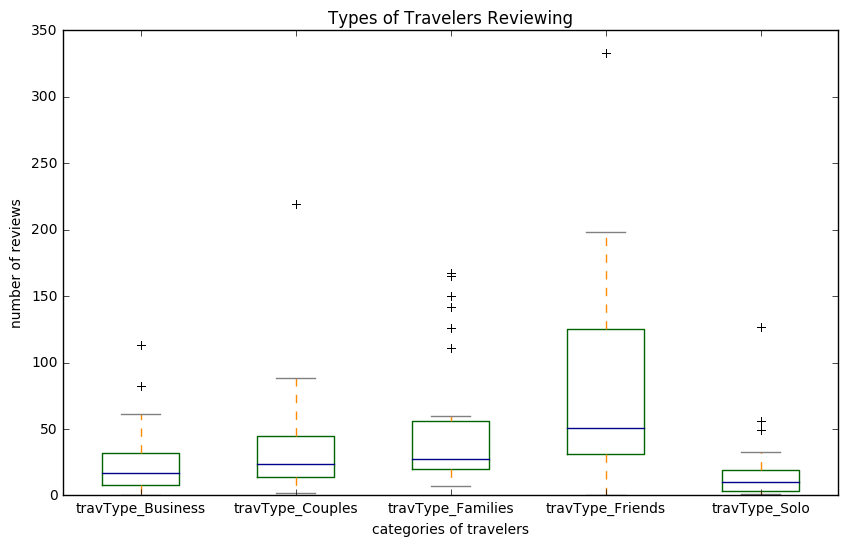

In [16]:
import matplotlib
%matplotlib inline
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
#fig = trav_typedf.astype(float).plot.box(color=color, sym='r+',figsize=(10, 6)).set_title('Types of Travelers reviewing')
fig = (trav_typedf.astype(float).plot.box(color=color, sym='r+',figsize=(10, 6)))
#fig.suptitle('What type of travelers choose to write reviews', fontsize=14, fontweight='bold')
matplotlib.axes.Axes.set_ylabel(fig,'number of reviews') #per restaurant
matplotlib.axes.Axes.set_xlabel(fig,'categories of travelers')
matplotlib.axes.Axes.set_title(fig,'Types of Travelers Reviewing')




#fig.set_xlabel('xlabel')()
#fig.set_ylabel('ylabel')()
#ax1.set_xlabel('Distribution')
#ax1.set_ylabel('Value'

In [17]:
resulting_df2.columns

Index(['languages', 'latitude', 'longitude', 'name', 'rank', 'rating',
       'review_count', 'times of year', 'travelers', 'lang_Arabic',
       'lang_Chinese', 'lang_English', 'lang_French', 'lang_German',
       'lang_Italian', 'lang_Japanese', 'lang_Russian', 'lang_Spanish',
       'travType_Business', 'travType_Couples', 'travType_Families',
       'travType_Friends', 'travType_Solo'],
      dtype='object')

In [18]:
lang_typedf = resulting_df2[['lang_English','lang_Arabic' ,'lang_French', 'lang_German',
       'lang_Italian', 'lang_Japanese', 'lang_Russian', 'lang_Spanish']].astype(float)

In [19]:
lang_typedf2 = resulting_df2[['lang_English','lang_Arabic']].astype(float)

In [20]:
#lang_typedf2.join(lang_typedf3.name('lang_others'), how='left')
#['lang_others']

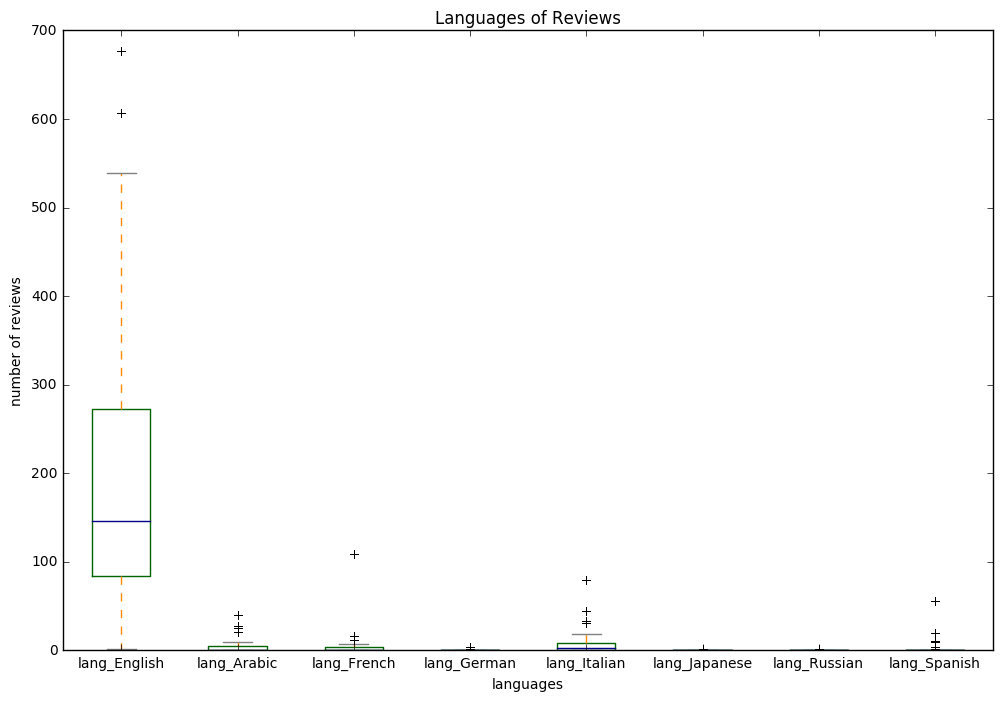

In [21]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
#fig = trav_typedf.astype(float).plot.box(color=color, sym='r+',figsize=(10, 6)).set_title('Types of Travelers reviewing')
fig = (lang_typedf.astype(float).plot.box(color=color, sym='r+',figsize=(12, 8)))
#fig.suptitle('What type of travelers choose to write reviews', fontsize=14, fontweight='bold')
matplotlib.axes.Axes.set_ylabel(fig,'number of reviews') #per restaurant
matplotlib.axes.Axes.set_xlabel(fig,'languages')
matplotlib.axes.Axes.set_title(fig,'Languages of Reviews')

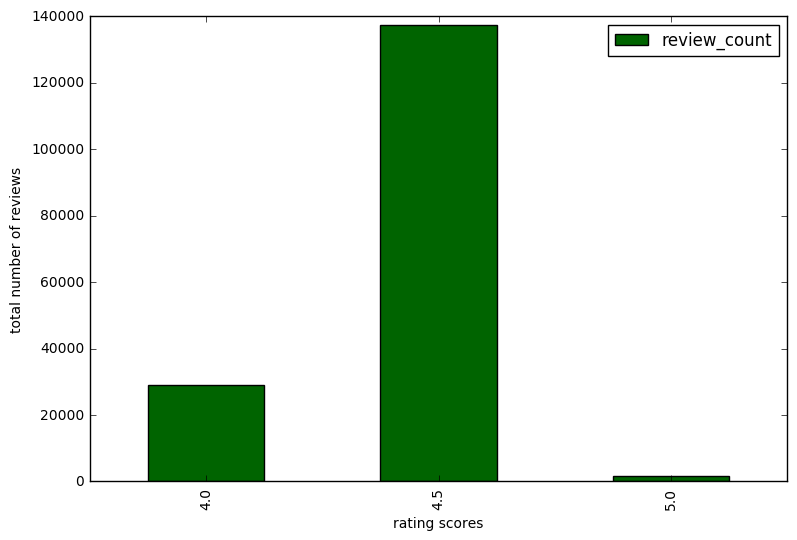

In [65]:
df2 = resulting_df2[['rating', 'review_count']]
df2 = df2.astype(float).fillna(0.0)
df2 = df2.groupby(['rating']).sum()
df2
fig3 = df2.plot(kind="bar",color = 'darkgreen', figsize=(9, 6) )
matplotlib.axes.Axes.set_ylabel(fig3,'total number of reviews') #per restaurant
matplotlib.axes.Axes.set_xlabel(fig3,'rating scores')
matplotlib.axes.Axes.set_title(fig3,' ')

In [ ]:
first.hist(column = 'prglngth', bins = 40, color = 'teal', \
           alpha = 0.5)
others.hist(column = 'prglngth', bins = 40, color = 'blue', \
            alpha = 0.5)
plt.show()